In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [43]:
from google.colab import files
uploaded=files.upload()

Saving unioncarbide.xls to unioncarbide (1).xls


In [44]:
data = pd.read_excel('unioncarbide.xls')
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [46]:
data.describe()

,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


# **MISSING VALUES**

In [48]:
data.isnull().sum()

X    0
Y    0
dtype: int64

no missing values

# **OUTLINES**

In [49]:
z = np.abs(stats.zscore(data))
print(z)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


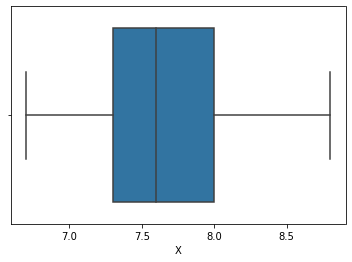

In [51]:
sns.boxplot(x=data['X'])

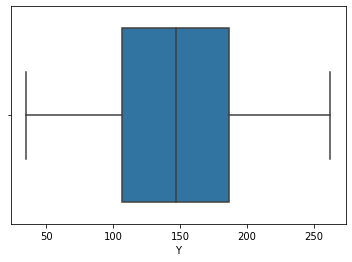

In [52]:
sns.boxplot(x=data['Y'])

In [53]:
filter = data[(z < 3).all(axis=1)]
filter.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [54]:
if(len(data)==len(filter)):
  print(len(data))
  print(len(filter))
  print("No Outliners")

34
34
No Outliners


# **DATA NORMALISATION**

In [69]:
data_norm=data.copy()
data_norm=(data_norm - data_norm.min())/(data_norm.max() - data_norm.min())
data_norm.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


# **SPLITTING DATA INTO TRAINING AND TESTING DATA**

In [70]:
data_train,data_test=train_test_split(data_norm,test_size=0.1)
data_test.head()

,X,Y
19,0.571429,0.528634
14,0.285714,0.378855
21,1.000000,0.493392
30,0.523810,0.493392


In [71]:
data_train.head()

,X,Y
13,0.523810,0.308370
9,0.380952,0.682819
6,0.285714,0.801762
1,0.190476,0.612335
12,0.285714,1.000000


# **TRAINING DATA**

In [72]:
x=np.array(data_train['X'])
y=np.array(data_train['Y'])

In [73]:
m=1
c=-1
iter=1
epochs=100
n=0.1
ns=len(data_train['X'])
error=[]

In [74]:
while(iter<=epochs):
  err=0
  for i in range(0,ns):
    err = err + ((y[i] - (m*x[i]) - c)**2)
    der_m = (-1)*((y[i] - (m*x[i]) - c)*x[i])
    der_c = (-1)*(y[i] - (m*x[i]) - c)

    m_change = (-1)*n*der_m
    c_change = (-1)*n*der_c

    m = m + m_change
    c = c + c_change

  iter = iter + 1
  err = (1/(2*len(data_train['X'])))*(err)
  error.append(err)

print(m,c)

-0.4574323089267302 0.6897303071260704


# **MEAN SQUARE ERROR OF TRAINING DATA**

In [75]:

data_train_pred =  m*data_train['X'] + c

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data_train['Y'],data_train_pred)
mse

0.055792340524322394

In [76]:
data_train_x = np.array(data_train['X'])
data_train_y = np.array(data_train['Y'])
pred2 = []
for i in data_train_x:
  pred2.append(m*i + c)

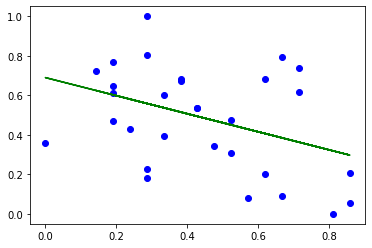

In [77]:
plt.plot(data_train_x,pred2,color='g')
plt.scatter(data_train_x,data_train_y,color='b')

# **ERROR ANALYSIS**

Text(0, 0.5, 'error at ith iteration')

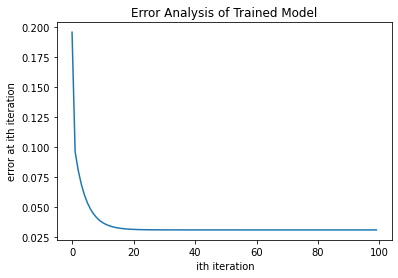

In [78]:
iters = np.arange(epochs)
plt.plot(iters,error)
plt.title("Error Analysis of Trained Model")
plt.xlabel(" ith iteration")
plt.ylabel("error at ith iteration")

# **Mean Square Error of tested data**

In [79]:
data_test_pred = m*data_test['X'] + c
mse2 = mean_squared_error(data_test['Y'],data_test_pred)
mse2

0.02814157703672725

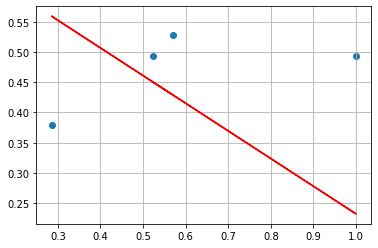

In [80]:
plt.scatter(data_test['X'],data_test['Y'])
plt.plot(data_test['X'],data_test_pred,'red')
plt.grid()

# **Predicting no.of Bicarbonates by given pH value**

In [81]:
min_x = data['X'].min()
max_x = data['X'].max()
min_y = data['Y'].min()
max_y = data['Y'].max()

In [82]:
input_x = float(input("enter the pH of well water:"))
input_xx = input_x
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = output_y*(max_y - min_y) + min_y
print("Total number of bicarbonates having pH =",input_xx,"is",output_y)

enter the pH of well water:2.9
Total number of bicarbonates having pH = 2.9 is 379.4645462319977
